In [1]:
from mpl_toolkits import mplot3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import pycountry


In [2]:
# Load dataset into a dataframe
df = pd.read_csv('laithwaites_wines_details.csv')
df.head()

,Unnamed: 0,Name,Country,Type,Year,Price,Rating,Review,Size,ABV
0,0,Cabalié 2021,France,Red,2021,11.99,4.5,7474,750.00,13.0
1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021,11.99,4.5,7445,750.00,14.5
2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020,15.49,4.5,543,750.00,14.5
3,3,w/o Organic Frappato 2021,See the full range,Red,2021,11.99,3.8,158,750.00,13.5
4,4,Pillastro Primitivo 2020,Italy,Red,2020,11.99,4.4,5873,750.00,13.5


In [3]:
# Rename the column name for convenience
df.rename(columns={"Rating" : 'rating', 
                   "Review" : 'num_review',
                   "Type": 'wine_type',
                   "Size" : 'size',
                   "Name": 'name',
                   "Price" : 'price',
                   "Country" : 'country',
                   "ABV": 'abv',
                   "Year" : 'year'}, inplace = True)
df

,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,size,abv
0,0,Cabalié 2021,France,Red,2021,11.99,4.5,7474,750.00,13.0
1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021,11.99,4.5,7445,750.00,14.5
2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020,15.49,4.5,543,750.00,14.5
3,3,w/o Organic Frappato 2021,See the full range,Red,2021,11.99,3.8,158,750.00,13.5
4,4,Pillastro Primitivo 2020,Italy,Red,2020,11.99,4.4,5873,750.00,13.5
...,...,...,...,...,...,...,...,...,...,...
1645,1645,Ferraton Père et Fils Cornas Lieu-Dit Patou 2...,Learn more about 'En Primeur',Red,2020,Not found,NaN,NaN,750.00,TBC
1646,1646,Château Troplong-Mondot 2021,Learn more about 'En Primeur',Red,2021,Not found,NaN,NaN,750.00,TBC
1647,1647,Clos Fourtet 2021,Learn more about 'En Primeur',Red,2021,Not found,NaN,NaN,750.00,TBC
1648,1648,Château Les-Ormes-de-Pez 2020,Learn more about 'En Primeur',Red,2020,Not found,NaN,NaN,750.00,TBC


In [4]:
# Check the dupulicate information
dups = df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [Unnamed: 0, name, country, wine_type, year, price, rating, num_review, size, abv]
Index: []


In [5]:
# Drop the missing value
df.drop(df[df['price'] == 'Not found'].index, inplace = True)
df

,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,size,abv
0,0,Cabalié 2021,France,Red,2021,11.99,4.5,7474,750.00,13.0
1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021,11.99,4.5,7445,750.00,14.5
2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020,15.49,4.5,543,750.00,14.5
3,3,w/o Organic Frappato 2021,See the full range,Red,2021,11.99,3.8,158,750.00,13.5
4,4,Pillastro Primitivo 2020,Italy,Red,2020,11.99,4.4,5873,750.00,13.5
...,...,...,...,...,...,...,...,...,...,...
1541,1541,Rémy Martin Tercet Cognac (70cl in gift box) ...,France,France,2021,99.0,NaN,NaN,700.00,42.0
1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014,42.0,NaN,NaN,750.00,12.0
1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022,12.99,3.9,300,750.00,12.0
1580,1580,Port Charlotte 10 Year Old Islay Single Malt ...,Great Britain,Great Britain,NV,52.5,NaN,NaN,700.00,50.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  884 non-null    int64 
 1   name        884 non-null    object
 2   country     884 non-null    object
 3   wine_type   884 non-null    object
 4   year        884 non-null    object
 5   price       884 non-null    object
 6   rating      720 non-null    object
 7   num_review  720 non-null    object
 8   size        884 non-null    object
 9   abv         884 non-null    object
dtypes: int64(1), object(9)
memory usage: 76.0+ KB


In [7]:
# Change the data type
df["num_review"] = df["num_review"].fillna(0).astype(int)
df["rating"] = df["rating"].apply(pd.to_numeric, errors = "coerce")
df["year"] = df["year"].apply(pd.to_numeric, errors = "coerce")
df["size"] = df["size"].apply(pd.to_numeric, errors = "coerce")
df["abv"] = df["abv"].apply(pd.to_numeric, errors = "coerce")
df["price"] = df["price"].apply(pd.to_numeric, errors = "coerce")
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  884 non-null    int64  
 1   name        884 non-null    object 
 2   country     884 non-null    object 
 3   wine_type   884 non-null    object 
 4   year        761 non-null    float64
 5   price       884 non-null    float64
 6   rating      720 non-null    float64
 7   num_review  884 non-null    int32  
 8   size        883 non-null    float64
 9   abv         883 non-null    float64
dtypes: float64(5), int32(1), int64(1), object(3)
memory usage: 72.5+ KB


In [8]:
df

,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,size,abv
0,0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,750.0,13.0
1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,750.0,14.5
2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,750.0,14.5
3,3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,750.0,13.5
4,4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,750.0,13.5
...,...,...,...,...,...,...,...,...,...,...
1541,1541,Rémy Martin Tercet Cognac (70cl in gift box) ...,France,France,2021.0,99.00,NaN,0,700.0,42.0
1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014.0,42.00,NaN,0,750.0,12.0
1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022.0,12.99,3.9,300,750.0,12.0
1580,1580,Port Charlotte 10 Year Old Islay Single Malt ...,Great Britain,Great Britain,NaN,52.50,NaN,0,700.0,50.0


In [9]:
df

,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,size,abv
0,0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,750.0,13.0
1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,750.0,14.5
2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,750.0,14.5
3,3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,750.0,13.5
4,4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,750.0,13.5
...,...,...,...,...,...,...,...,...,...,...
1541,1541,Rémy Martin Tercet Cognac (70cl in gift box) ...,France,France,2021.0,99.00,NaN,0,700.0,42.0
1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014.0,42.00,NaN,0,750.0,12.0
1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022.0,12.99,3.9,300,750.0,12.0
1580,1580,Port Charlotte 10 Year Old Islay Single Malt ...,Great Britain,Great Britain,NaN,52.50,NaN,0,700.0,50.0


In [10]:
# Check for na values
df.isna().any()

Unnamed: 0    False
name          False
country       False
wine_type     False
year           True
price         False
rating         True
num_review    False
size           True
abv            True
dtype: bool

In [11]:
# Count NA values
df.isna().sum()

Unnamed: 0      0
name            0
country         0
wine_type       0
year          123
price           0
rating        164
num_review      0
size            1
abv             1
dtype: int64

In [12]:
df

,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,size,abv
0,0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,750.0,13.0
1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,750.0,14.5
2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,750.0,14.5
3,3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,750.0,13.5
4,4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,750.0,13.5
...,...,...,...,...,...,...,...,...,...,...
1541,1541,Rémy Martin Tercet Cognac (70cl in gift box) ...,France,France,2021.0,99.00,NaN,0,700.0,42.0
1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014.0,42.00,NaN,0,750.0,12.0
1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022.0,12.99,3.9,300,750.0,12.0
1580,1580,Port Charlotte 10 Year Old Islay Single Malt ...,Great Britain,Great Britain,NaN,52.50,NaN,0,700.0,50.0


In [13]:
# Check number of unique values in all columns
df.nunique()

Unnamed: 0    884
name          882
country        29
wine_type      18
year           20
price         104
rating         28
num_review    286
size           11
abv            48
dtype: int64

array([ 750.,  375.,  330., 3000.,  500.,  187.,  700., 1500.,  440.,
         nan, 2500.,  200.])

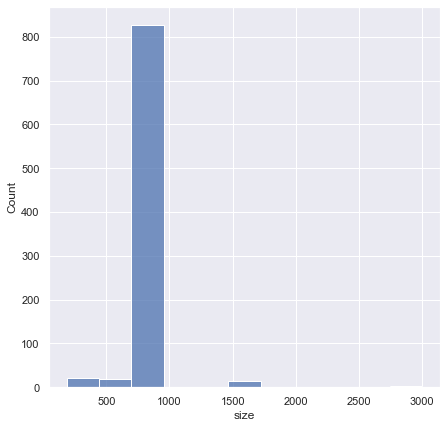

In [14]:
# Histogram plots for rating
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(df["size"])
df["size"].unique()

<bound method Series.unique of 0       4.5
1       4.5
2       4.5
3       3.8
4       4.4
       ... 
1541    NaN
1550    NaN
1565    3.9
1580    NaN
1599    NaN
Name: rating, Length: 884, dtype: float64>

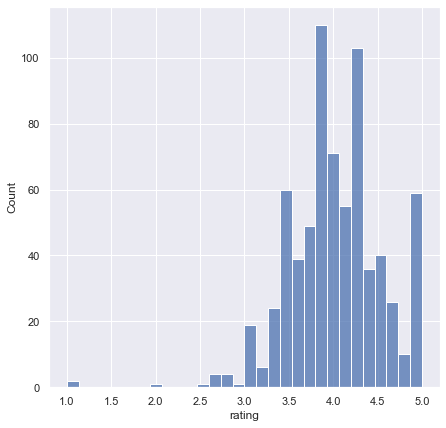

In [15]:
sns.set(rc={"figure.figsize":(7,7)})
sns.histplot(df["rating"])
df["rating"].unique

<bound method Series.unique of 0       7474
1       7445
2        543
3        158
4       5873
        ... 
1541       0
1550       0
1565     300
1580       0
1599       0
Name: num_review, Length: 884, dtype: int32>

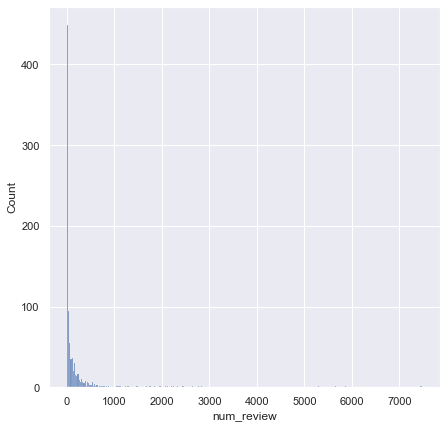

In [16]:
sns.histplot(df["num_review"])
df["num_review"].unique

In [17]:
max(df['num_review'])

7474

In [18]:
min(df['num_review'])

0

In [19]:
min(df['price'])

1.99

In [20]:
# Check unique countries
df["country"].unique()

array([' France ', ' Australia ', ' Portugal ', 'See the full range',
       ' Italy ', ' Spain ', ' South Africa ', ' Chile ', ' New Zealand ',
       ' Argentina ', ' Hungary ', ' USA ', ' Czech Republic ',
       ' Austria ', ' Germany ', ' Croatia ', ' Lebanon ', ' Moldova ',
       ' Multiple Countries ', ' Great Britain ', ' Greece ', ' Romania ',
       ' Bulgaria ', ' Barbados ', ' Mexico ', ' Ireland ', ' Poland ',
       ' Denmark ', "Learn more about 'En Primeur'"], dtype=object)

<AxesSubplot:xlabel='abv', ylabel='Count'>

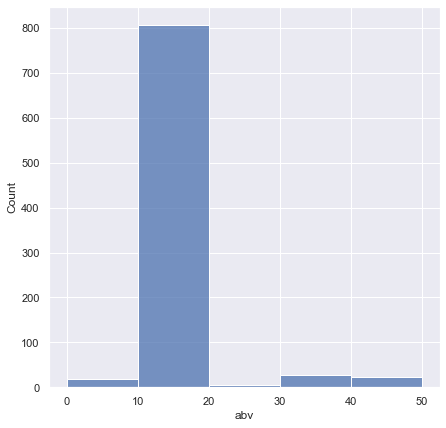

In [21]:
# Histogram plot of ABV

sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(df["abv"], kde=False, bins=5)

<AxesSubplot:xlabel='year', ylabel='Count'>

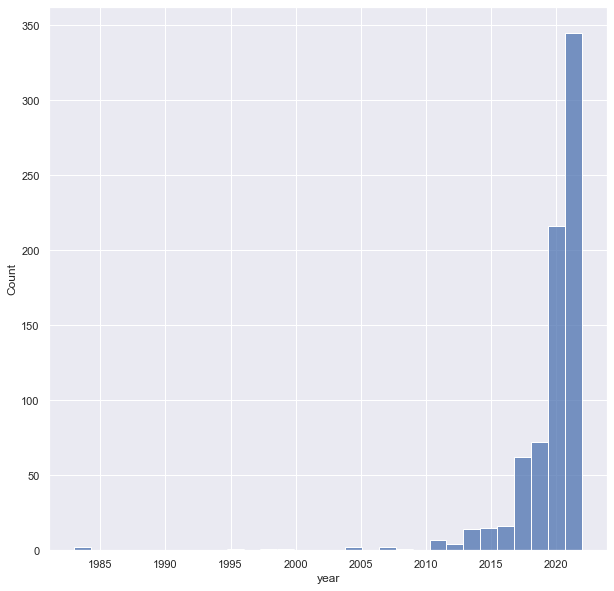

In [22]:
# Histogram plot of year

df["year"].isna().sum()/len(df["year"])*100
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(df["year"], bins=30)


In [23]:
# Check unique of type
df['wine_type'].unique()

array([' Red ', ' White ', ' Rosé ', ' France ', ' Czech Republic ',
       ' Touriga Nacional', ' Great Britain ', ' Cabernet Sauvignon ',
       ' Orange ', ' White Blend ', ' Barbados ', ' Baco Blanc ', ' USA ',
       ' Mexico ', ' Ireland ', ' Australia ', ' Poland ', ' Denmark '],
      dtype=object)

In [24]:
df_country = df.groupby('country')['country'].count()
df_country


country
 Argentina                        37
 Australia                        98
 Austria                           5
 Barbados                          4
 Bulgaria                          2
 Chile                            31
 Croatia                           1
 Czech Republic                    1
 Denmark                           1
 France                          279
 Germany                          10
 Great Britain                    44
 Greece                            2
 Hungary                           5
 Ireland                           2
 Italy                           113
 Lebanon                           2
 Mexico                            3
 Moldova                           8
 Multiple Countries                1
 New Zealand                      24
 Poland                            3
 Portugal                         46
 Romania                           3
 South Africa                     48
 Spain                            92
 USA                          

In [25]:
df['wine_type'].unique()

array([' Red ', ' White ', ' Rosé ', ' France ', ' Czech Republic ',
       ' Touriga Nacional', ' Great Britain ', ' Cabernet Sauvignon ',
       ' Orange ', ' White Blend ', ' Barbados ', ' Baco Blanc ', ' USA ',
       ' Mexico ', ' Ireland ', ' Australia ', ' Poland ', ' Denmark '],
      dtype=object)

In [26]:
# drop the un-relevant wine types
# check the unique wines in the df
df['wine_type'].unique()

# remove spaces from the wine type - treating string as a list of characters
# and selecting only from the second to the last-but-one character

# take note of the required ones
# NOTE: Rose has an accent on the e - so I copied it from the output printed above
selected_wines = [' Red ', ' White ', ' Rosé ', ' Orange ', ' White Blend ']

# use .isin() to select only those rows that have the wines from the selected list
df1 = df[df['wine_type'].isin(selected_wines)]

df1["wine_type"].unique()
df1["wine_type"] = df1["wine_type"].apply(lambda x: x[1:-1])

# remove the accent on the e for Rose
df1.replace("Rosé", "Rose", inplace=True)

df1["wine_type"].unique()

C:\Users\98179\AppData\Local\Temp\ipykernel_22908\1765463349.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["wine_type"] = df1["wine_type"].apply(lambda x: x[1:-1])
C:\Users\98179\AppData\Local\Temp\ipykernel_22908\1765463349.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("Rosé", "Rose", inplace=True)


array(['Red', 'White', 'Rose', 'Orange', 'White Blend'], dtype=object)

In [27]:
df = df1
df

,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,size,abv
0,0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,750.0,13.0
1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,750.0,14.5
2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,750.0,14.5
3,3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,750.0,13.5
4,4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,750.0,13.5
...,...,...,...,...,...,...,...,...,...,...
1485,1485,Fray Leon Sauvignon Blanc Reserva 2022,Chile,White,2022.0,12.99,4.2,26,750.0,13.0
1531,1531,Torbreck Factor (magnum) 2019,Learn more about 'En Primeur',Red,2019.0,180.00,NaN,0,1500.0,NaN
1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014.0,42.00,NaN,0,750.0,12.0
1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022.0,12.99,3.9,300,750.0,12.0


In [28]:
# Feature Engineering

df = df.reset_index()

# Find age
df.loc[:, "age"] = 2022 - df["year"]

# # one hot encoding of wine_type (after merge)
# pd.get_dummies(decantalo, drop_first=True, columns=["wine_type"])

# Creating a column with ratings >5
for i, num in enumerate(df["num_review"]):
    if num > 5:
        df.loc[i, "score"] = df.loc[i, "rating"]
    else:
        df.loc[i, "score"] = 0

In [29]:
# Impute size to most frequent value

impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[["size"]]=impute.fit_transform(df[["size"]])


# To scale size
for i, size in enumerate(df["size"]):
    df.loc[i, "size (cL)"] = df.loc[i, "size"]/10


# Creating a new column log price as it is skewed
df.loc[:, "logprice"] = np.log10(df.loc[:,"price"])

In [30]:
df

,index,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,size,abv,age,score,size (cL),logprice
0,0,0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,750.0,13.0,1.0,4.5,75.0,1.078819
1,1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,750.0,14.5,1.0,4.5,75.0,1.078819
2,2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,750.0,14.5,2.0,4.5,75.0,1.190051
3,3,3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,750.0,13.5,1.0,3.8,75.0,1.078819
4,4,4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,750.0,13.5,2.0,4.4,75.0,1.078819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,1485,1485,Fray Leon Sauvignon Blanc Reserva 2022,Chile,White,2022.0,12.99,4.2,26,750.0,13.0,0.0,4.2,75.0,1.113609
814,1531,1531,Torbreck Factor (magnum) 2019,Learn more about 'En Primeur',Red,2019.0,180.00,NaN,0,1500.0,NaN,3.0,0.0,150.0,2.255273
815,1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014.0,42.00,NaN,0,750.0,12.0,8.0,0.0,75.0,1.623249
816,1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022.0,12.99,3.9,300,750.0,12.0,0.0,3.9,75.0,1.113609


<AxesSubplot:>

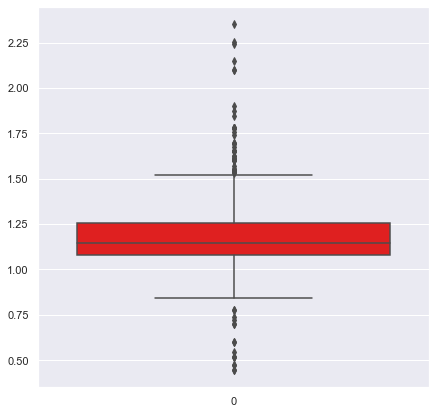

In [31]:
# price visualisation
sns.set(rc={"figure.figsize":(7,7)})

sns.boxplot(data=(df["logprice"]), color= "red")

<AxesSubplot:xlabel='Count', ylabel='country'>

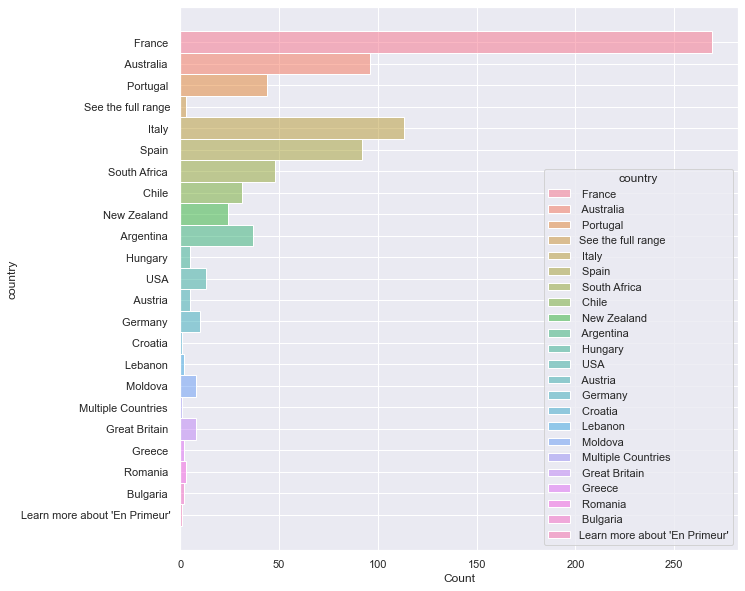

In [32]:
# Countries visualisation

sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(data=df, y="country", hue="country")

<AxesSubplot:xlabel='wine_type', ylabel='logprice'>

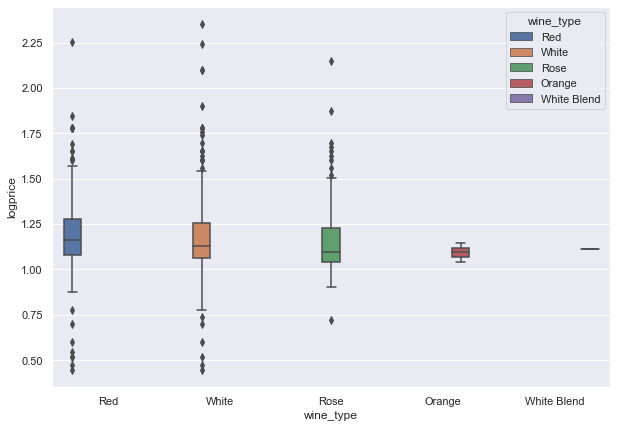

In [33]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(10,7)})

sns.boxplot(
    data=df,
    x="wine_type", y="logprice", hue="wine_type"
)

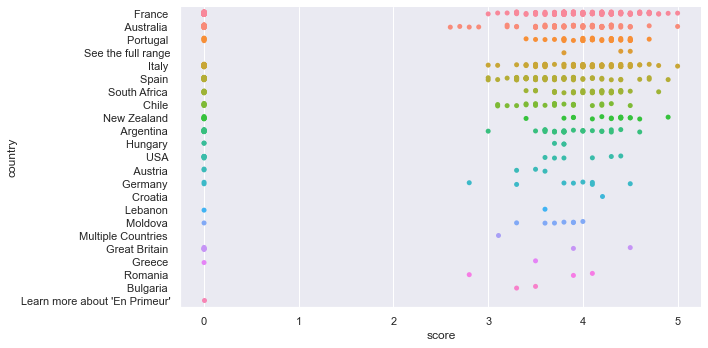

In [34]:
# plot country vs review ratings

sns.catplot(data=df.loc[df["country"]!="unknown"], y="country", x="score", height=5, aspect=2)


Text(0.5, 0, 'LogPrice')

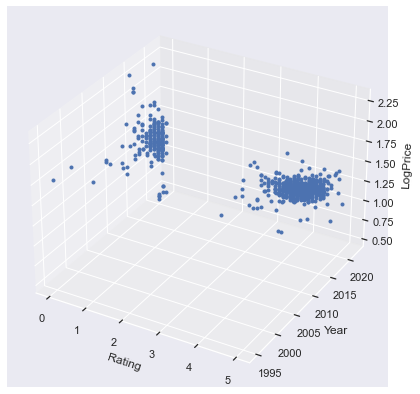

In [35]:
# Plot log price vs age and rating



fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(df["score"], df["year"], df["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Year")
ax.set_zlabel("LogPrice")

In [39]:
del df['size']
df.rename(columns={"size (cL)" : 'size'}, inplace = True)
df

,index,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,abv,age,score,size,logprice,scaledprice
0,0,0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,13.0,1.0,4.5,75.0,0.078819,1.199
1,1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,14.5,1.0,4.5,75.0,0.078819,1.199
2,2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,14.5,2.0,4.5,75.0,0.190051,1.549
3,3,3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,13.5,1.0,3.8,75.0,0.078819,1.199
4,4,4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,13.5,2.0,4.4,75.0,0.078819,1.199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,1485,1485,Fray Leon Sauvignon Blanc Reserva 2022,Chile,White,2022.0,12.99,4.2,26,13.0,0.0,4.2,75.0,0.113609,1.299
814,1531,1531,Torbreck Factor (magnum) 2019,Learn more about 'En Primeur',Red,2019.0,180.00,NaN,0,NaN,3.0,0.0,150.0,0.954243,9.000
815,1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014.0,42.00,NaN,0,12.0,8.0,0.0,75.0,0.623249,4.200
816,1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022.0,12.99,3.9,300,12.0,0.0,3.9,75.0,0.113609,1.299


In [40]:
impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[["size"]]=impute.fit_transform(df[["size"]])


# To scale size
for i, size in enumerate(df["size"]):
    df.loc[i, "scaledprice"] = df.loc[i, "price"] * 75 / size

df.loc[df["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
df.loc[:, "logprice"] = np.log10(df.loc[:,"scaledprice"])

In [42]:
df

,index,Unnamed: 0,name,country,wine_type,year,price,rating,num_review,abv,age,score,size,logprice,scaledprice
0,0,0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,13.0,1.0,4.5,75.0,1.078819,11.99
1,1,1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,14.5,1.0,4.5,75.0,1.078819,11.99
2,2,2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,14.5,2.0,4.5,75.0,1.190051,15.49
3,3,3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,13.5,1.0,3.8,75.0,1.078819,11.99
4,4,4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,13.5,2.0,4.4,75.0,1.078819,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,1485,1485,Fray Leon Sauvignon Blanc Reserva 2022,Chile,White,2022.0,12.99,4.2,26,13.0,0.0,4.2,75.0,1.113609,12.99
814,1531,1531,Torbreck Factor (magnum) 2019,Learn more about 'En Primeur',Red,2019.0,180.00,NaN,0,NaN,3.0,0.0,150.0,1.954243,90.00
815,1550,1550,Hattingley Blanc de Blancs 2014,Great Britain,White,2014.0,42.00,NaN,0,12.0,8.0,0.0,75.0,1.623249,42.00
816,1565,1565,Kora Marlborough Sauvignon Blanc 2022,New Zealand,White,2022.0,12.99,3.9,300,12.0,0.0,3.9,75.0,1.113609,12.99


In [45]:
laithwaites_to_merge = df[["name", "country", "wine_type", "year", "scaledprice", "score", "num_review", "abv", "age", "size", "logprice", "price"]]
laithwaites_to_merge.head(20)


,name,country,wine_type,year,scaledprice,score,num_review,abv,age,size,logprice,price
0,Cabalié 2021,France,Red,2021.0,11.99,4.5,7474,13.0,1.0,75.0,1.078819,11.99
1,The Black Stump Durif Shiraz 2021,Australia,Red,2021.0,11.99,4.5,7445,14.5,1.0,75.0,1.078819,11.99
2,Vinha do Fava Reserva 2020,Portugal,Red,2020.0,15.49,4.5,543,14.5,2.0,75.0,1.190051,15.49
3,w/o Organic Frappato 2021,See the full range,Red,2021.0,11.99,3.8,158,13.5,1.0,75.0,1.078819,11.99
4,Pillastro Primitivo 2020,Italy,Red,2020.0,11.99,4.4,5873,13.5,2.0,75.0,1.078819,11.99
5,Aluado Alicante Bouschet 2021,Portugal,Red,2021.0,10.99,4.5,1967,12.5,1.0,75.0,1.040998,10.99
6,Farinelli Pinot Grigio 2021,Italy,White,2021.0,7.99,4.0,377,12.5,1.0,75.0,0.902547,7.99
7,Cabalié Blanc 2021,France,White,2021.0,11.99,4.4,1074,11.5,1.0,75.0,1.078819,11.99
8,Hacienda de Lluna Moscatel Rosado 2021,Spain,Rose,2021.0,5.29,4.1,428,5.0,1.0,75.0,0.723456,5.29
9,Brezza Bianca Frizzante Prosecco NV,Italy,White,NaN,8.49,4.3,244,11.0,NaN,75.0,0.928908,8.49


In [46]:
laithwaites_to_merge.to_csv('laithwaites_to_merge.csv')
